In [12]:
print(f"------------------------------------------------------------------------------")
print(f"PROYEK AKHIR BIG DATA & DATA MINING (ST168)")
print(f"Analisis Prediksi Biaya Medis Personal Menggunakan Random Forest Regression")
print(f"------------------------------------------------------------------------------")
print(f"Nama  : Ahmad Natsrul Ulum")
print(f"NIM   : 23.11.5524")
print(f"Kelas : 23S1IF-BigData3")



------------------------------------------------------------------------------
PROYEK AKHIR BIG DATA & DATA MINING (ST168)
Analisis Prediksi Biaya Medis Personal Menggunakan Random Forest Regression
------------------------------------------------------------------------------
Nama  : Ahmad Natsrul Ulum
NIM   : 23.11.5524
Kelas : 23S1IF-BigData3


In [13]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Konfigurasi Visualisasi
sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 300

In [14]:
# 2. Load Datset
try:
    df = pd.read_csv('insurance.csv')
    print("Dataset berhasil dimuat!")
    print(f"Dimensi Data: {df.shape[0]} baris, {df.shape[1]} kolom")
except FileNotFoundError:
    print("Error: File 'insurance.csv' tidak ditemukan. Mohon upload file terlebih dahulu.")

Dataset berhasil dimuat!
Dimensi Data: 1338 baris, 7 kolom


In [15]:
# 3. Data Profiling dan Preprocessing
print(f"------------------------------------------------------")
print("3. DATA PREPROCESSING")
print(f"------------------------------------------------------")

# a. Cek Missing Values
print(f"Jumlah Missing Values: {df.isnull().sum().sum()}")

# b. Encoding Variabel Kategorikal (Label Encoding)
# Mengubah text menjadi angka agar bisa diproses algoritma
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])       # female=0, male=1
df['smoker'] = le.fit_transform(df['smoker']) # no=0, yes=1
df['region'] = le.fit_transform(df['region']) # northeast=0, dst..

print("Data setelah encoding (5 baris pertama):")
display(df.head())

------------------------------------------------------
3. DATA PREPROCESSING
------------------------------------------------------
Jumlah Missing Values: 0
Data setelah encoding (5 baris pertama):


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


------------------------------------------------------
4. GENERATING PLOTS FOR REPORT
------------------------------------------------------


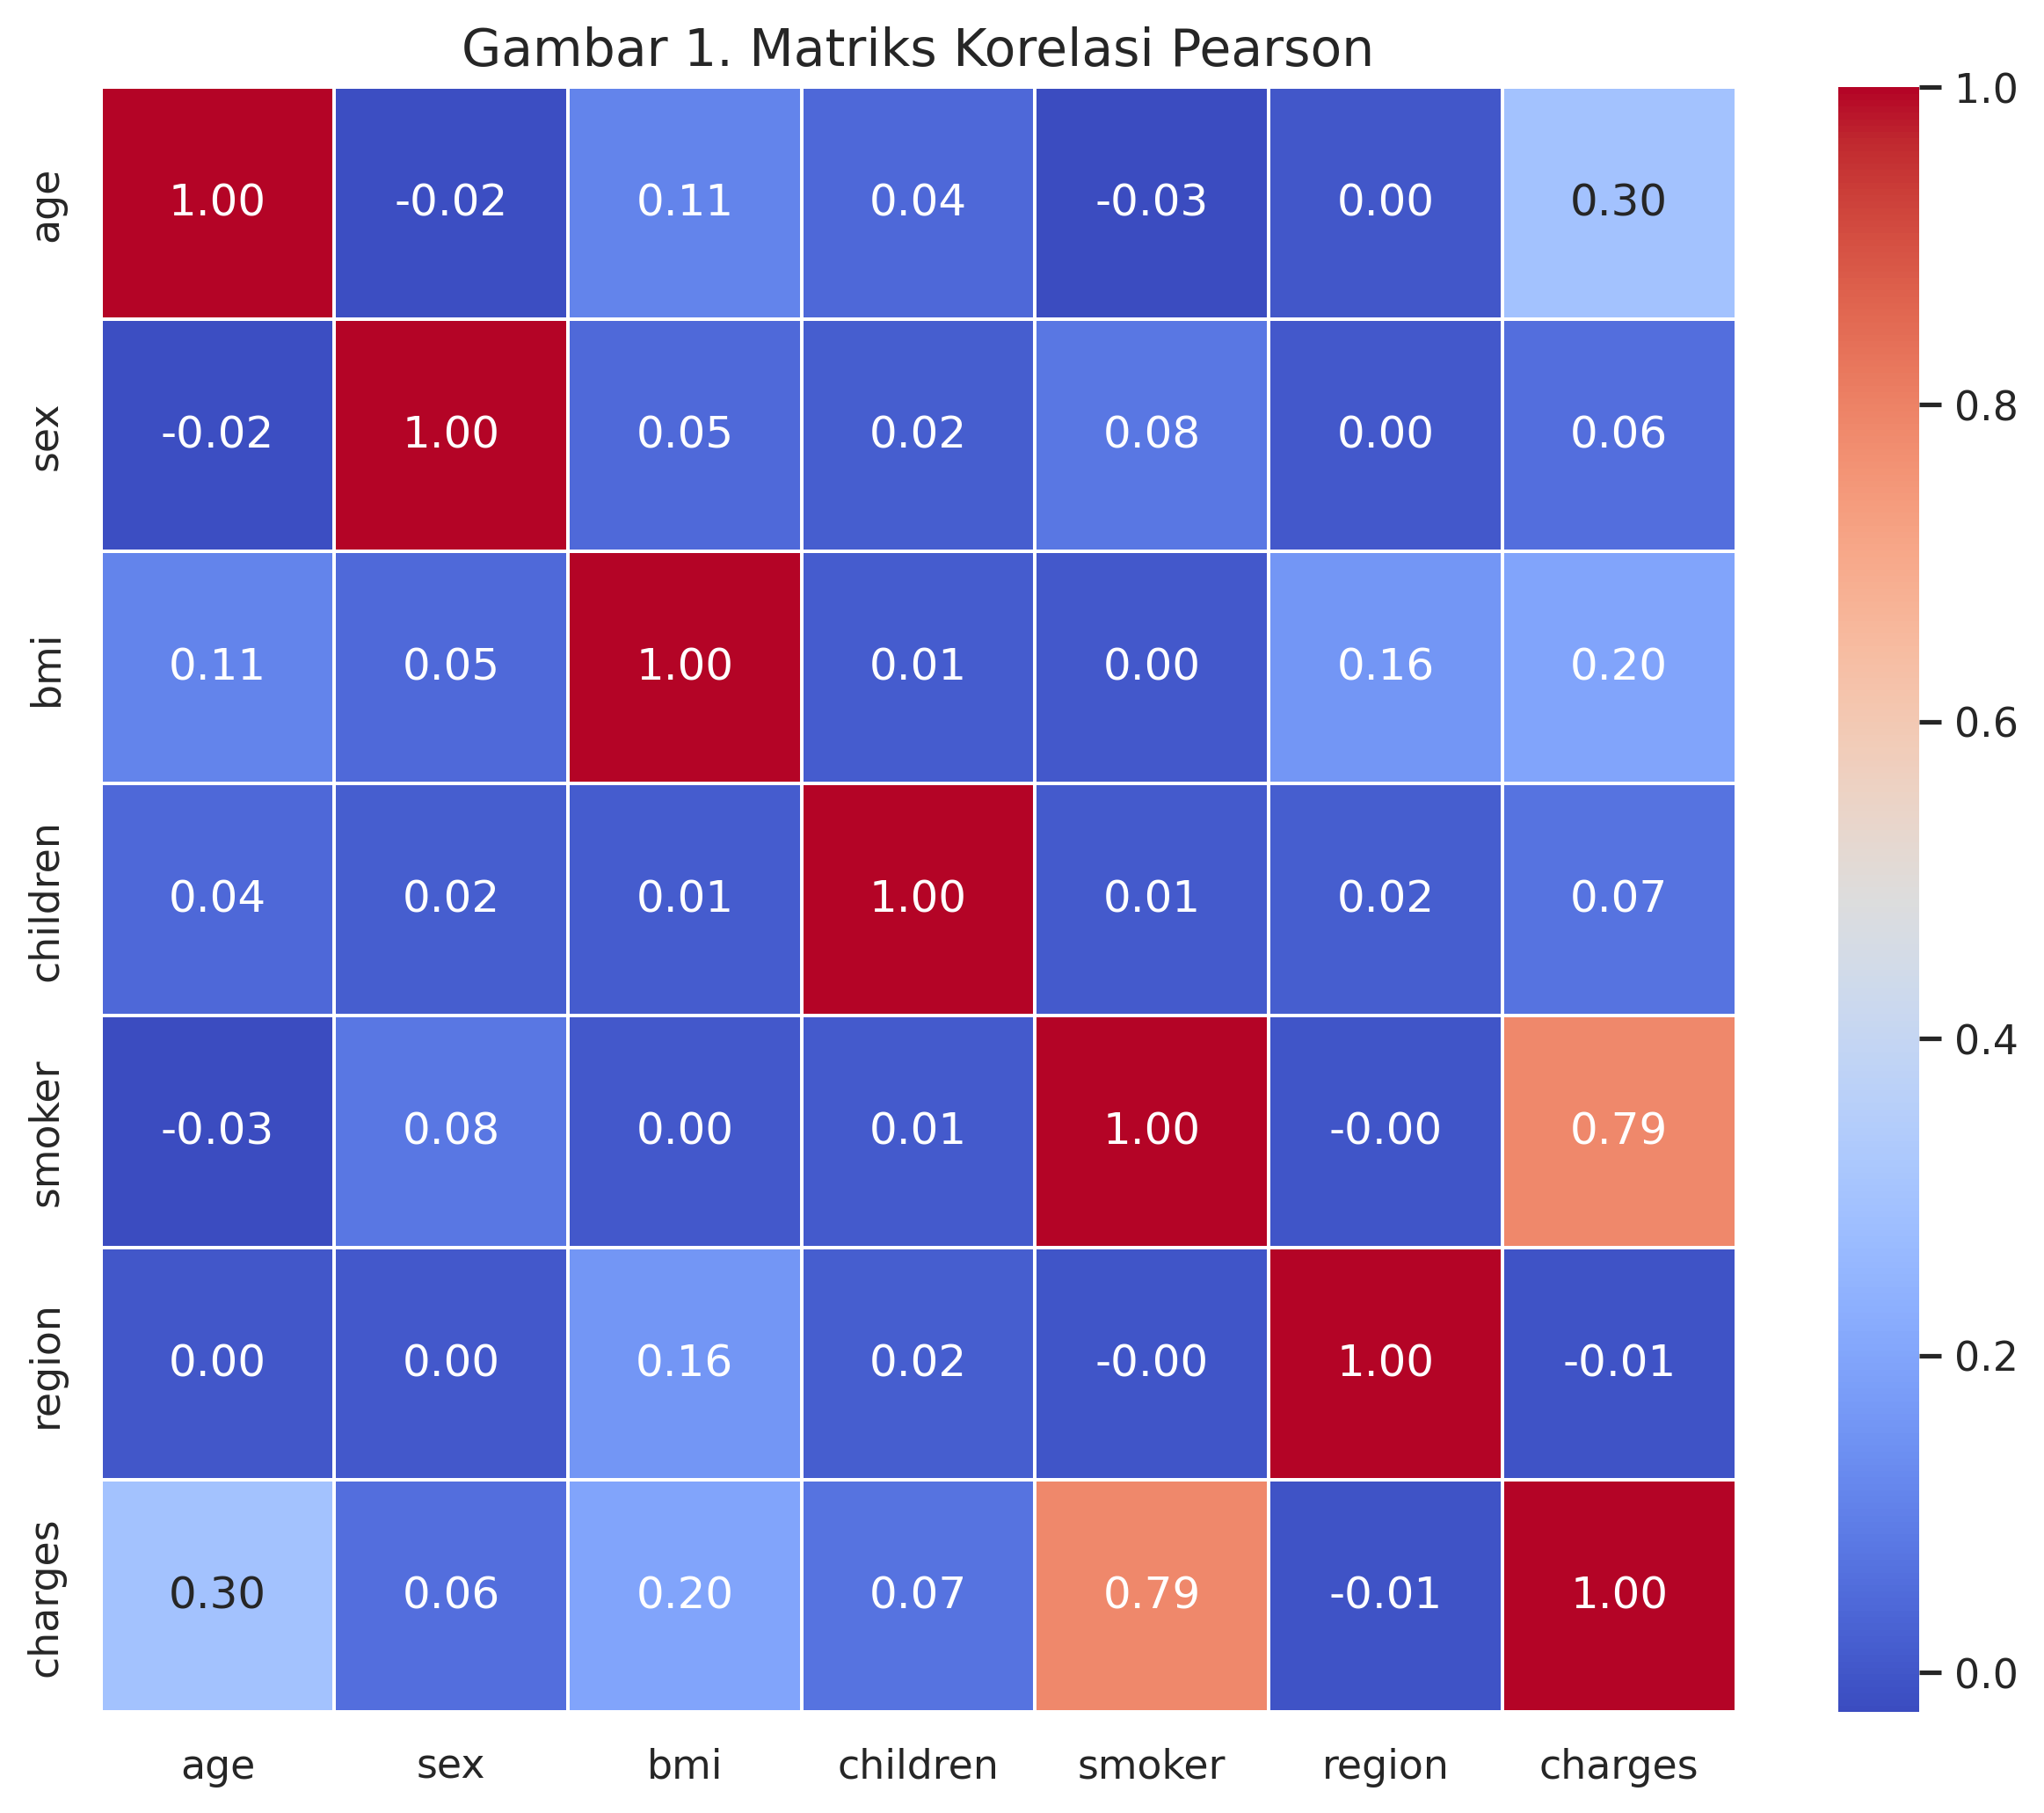

In [16]:
# 4. Exploratory Data Analysis (EDA)
print(f"------------------------------------------------------")
print("4. GENERATING PLOTS FOR REPORT")
print(f"------------------------------------------------------")

# 4.1. Heatmap Korelasi
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Gambar 1. Matriks Korelasi Pearson', fontsize=14)
plt.savefig('Gambar1_Heatmap.png', bbox_inches='tight')
plt.show()

/tmp/ipykernel_21430/568152308.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')


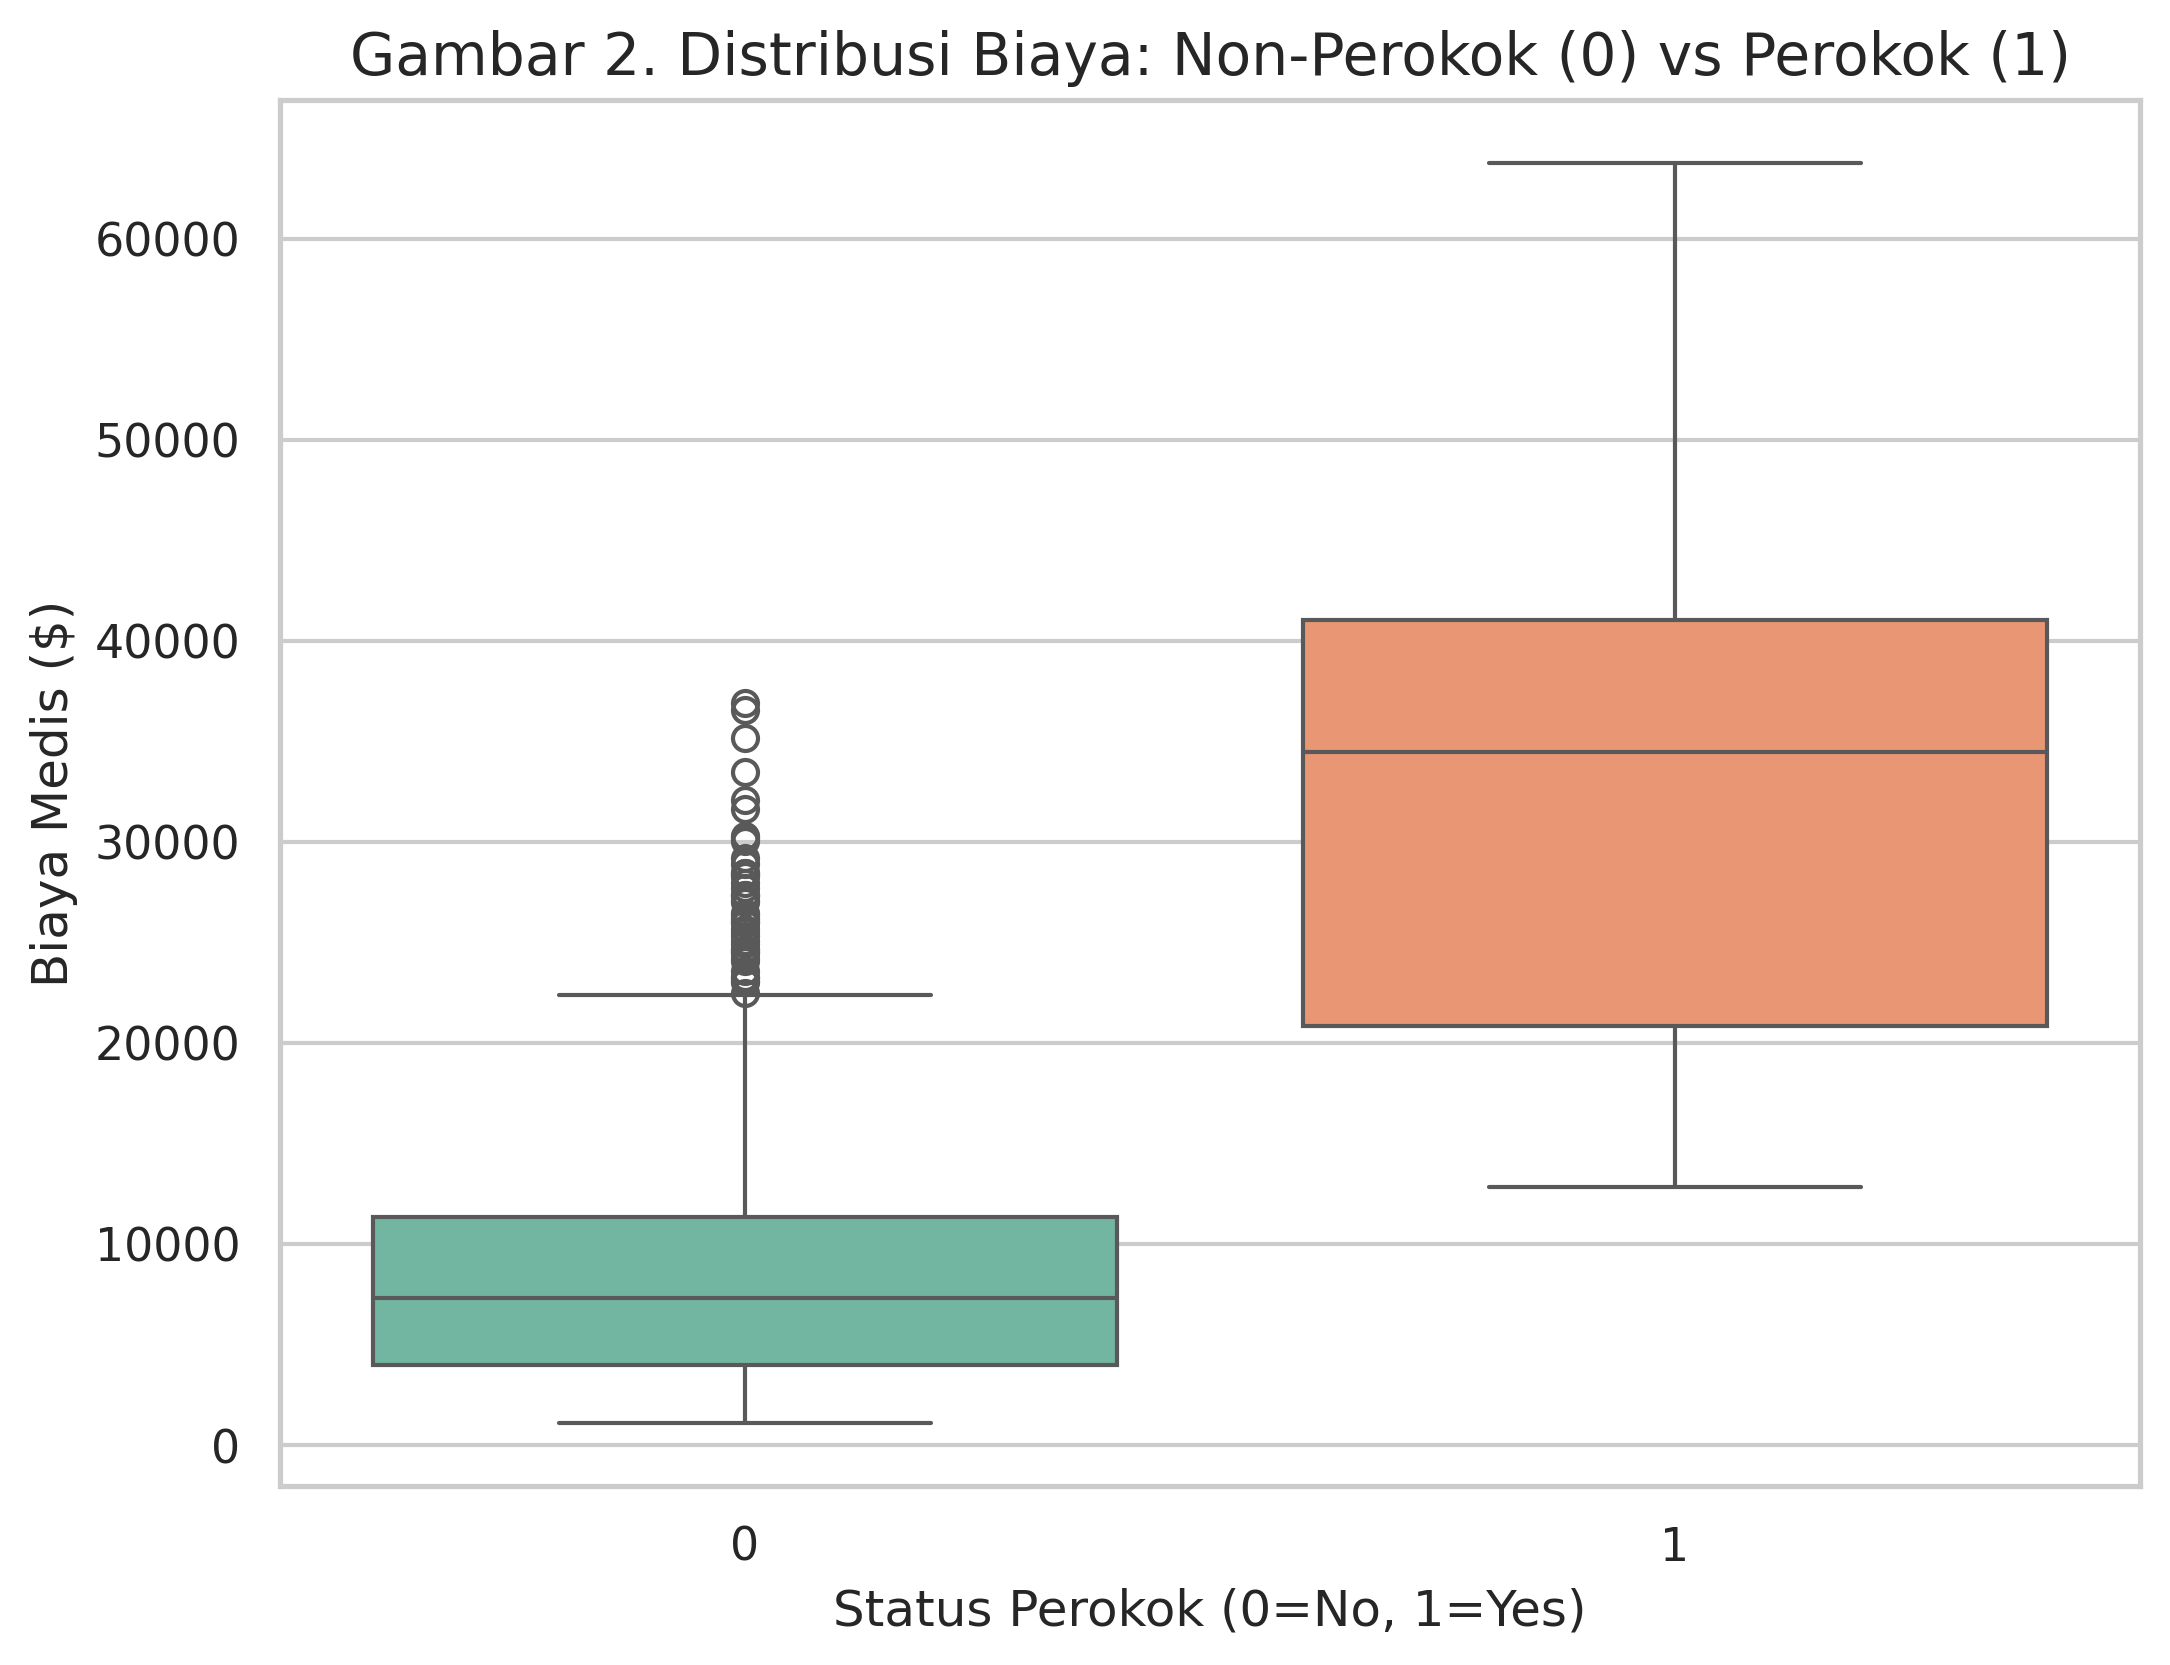

In [17]:
# 4.2. Boxplot (Smoker vs Charges)
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')
plt.title('Gambar 2. Distribusi Biaya: Non-Perokok (0) vs Perokok (1)', fontsize=14)
plt.xlabel('Status Perokok (0=No, 1=Yes)')
plt.ylabel('Biaya Medis ($)')
plt.savefig('Gambar2_Boxplot_Smoker.png', bbox_inches='tight')
plt.show()

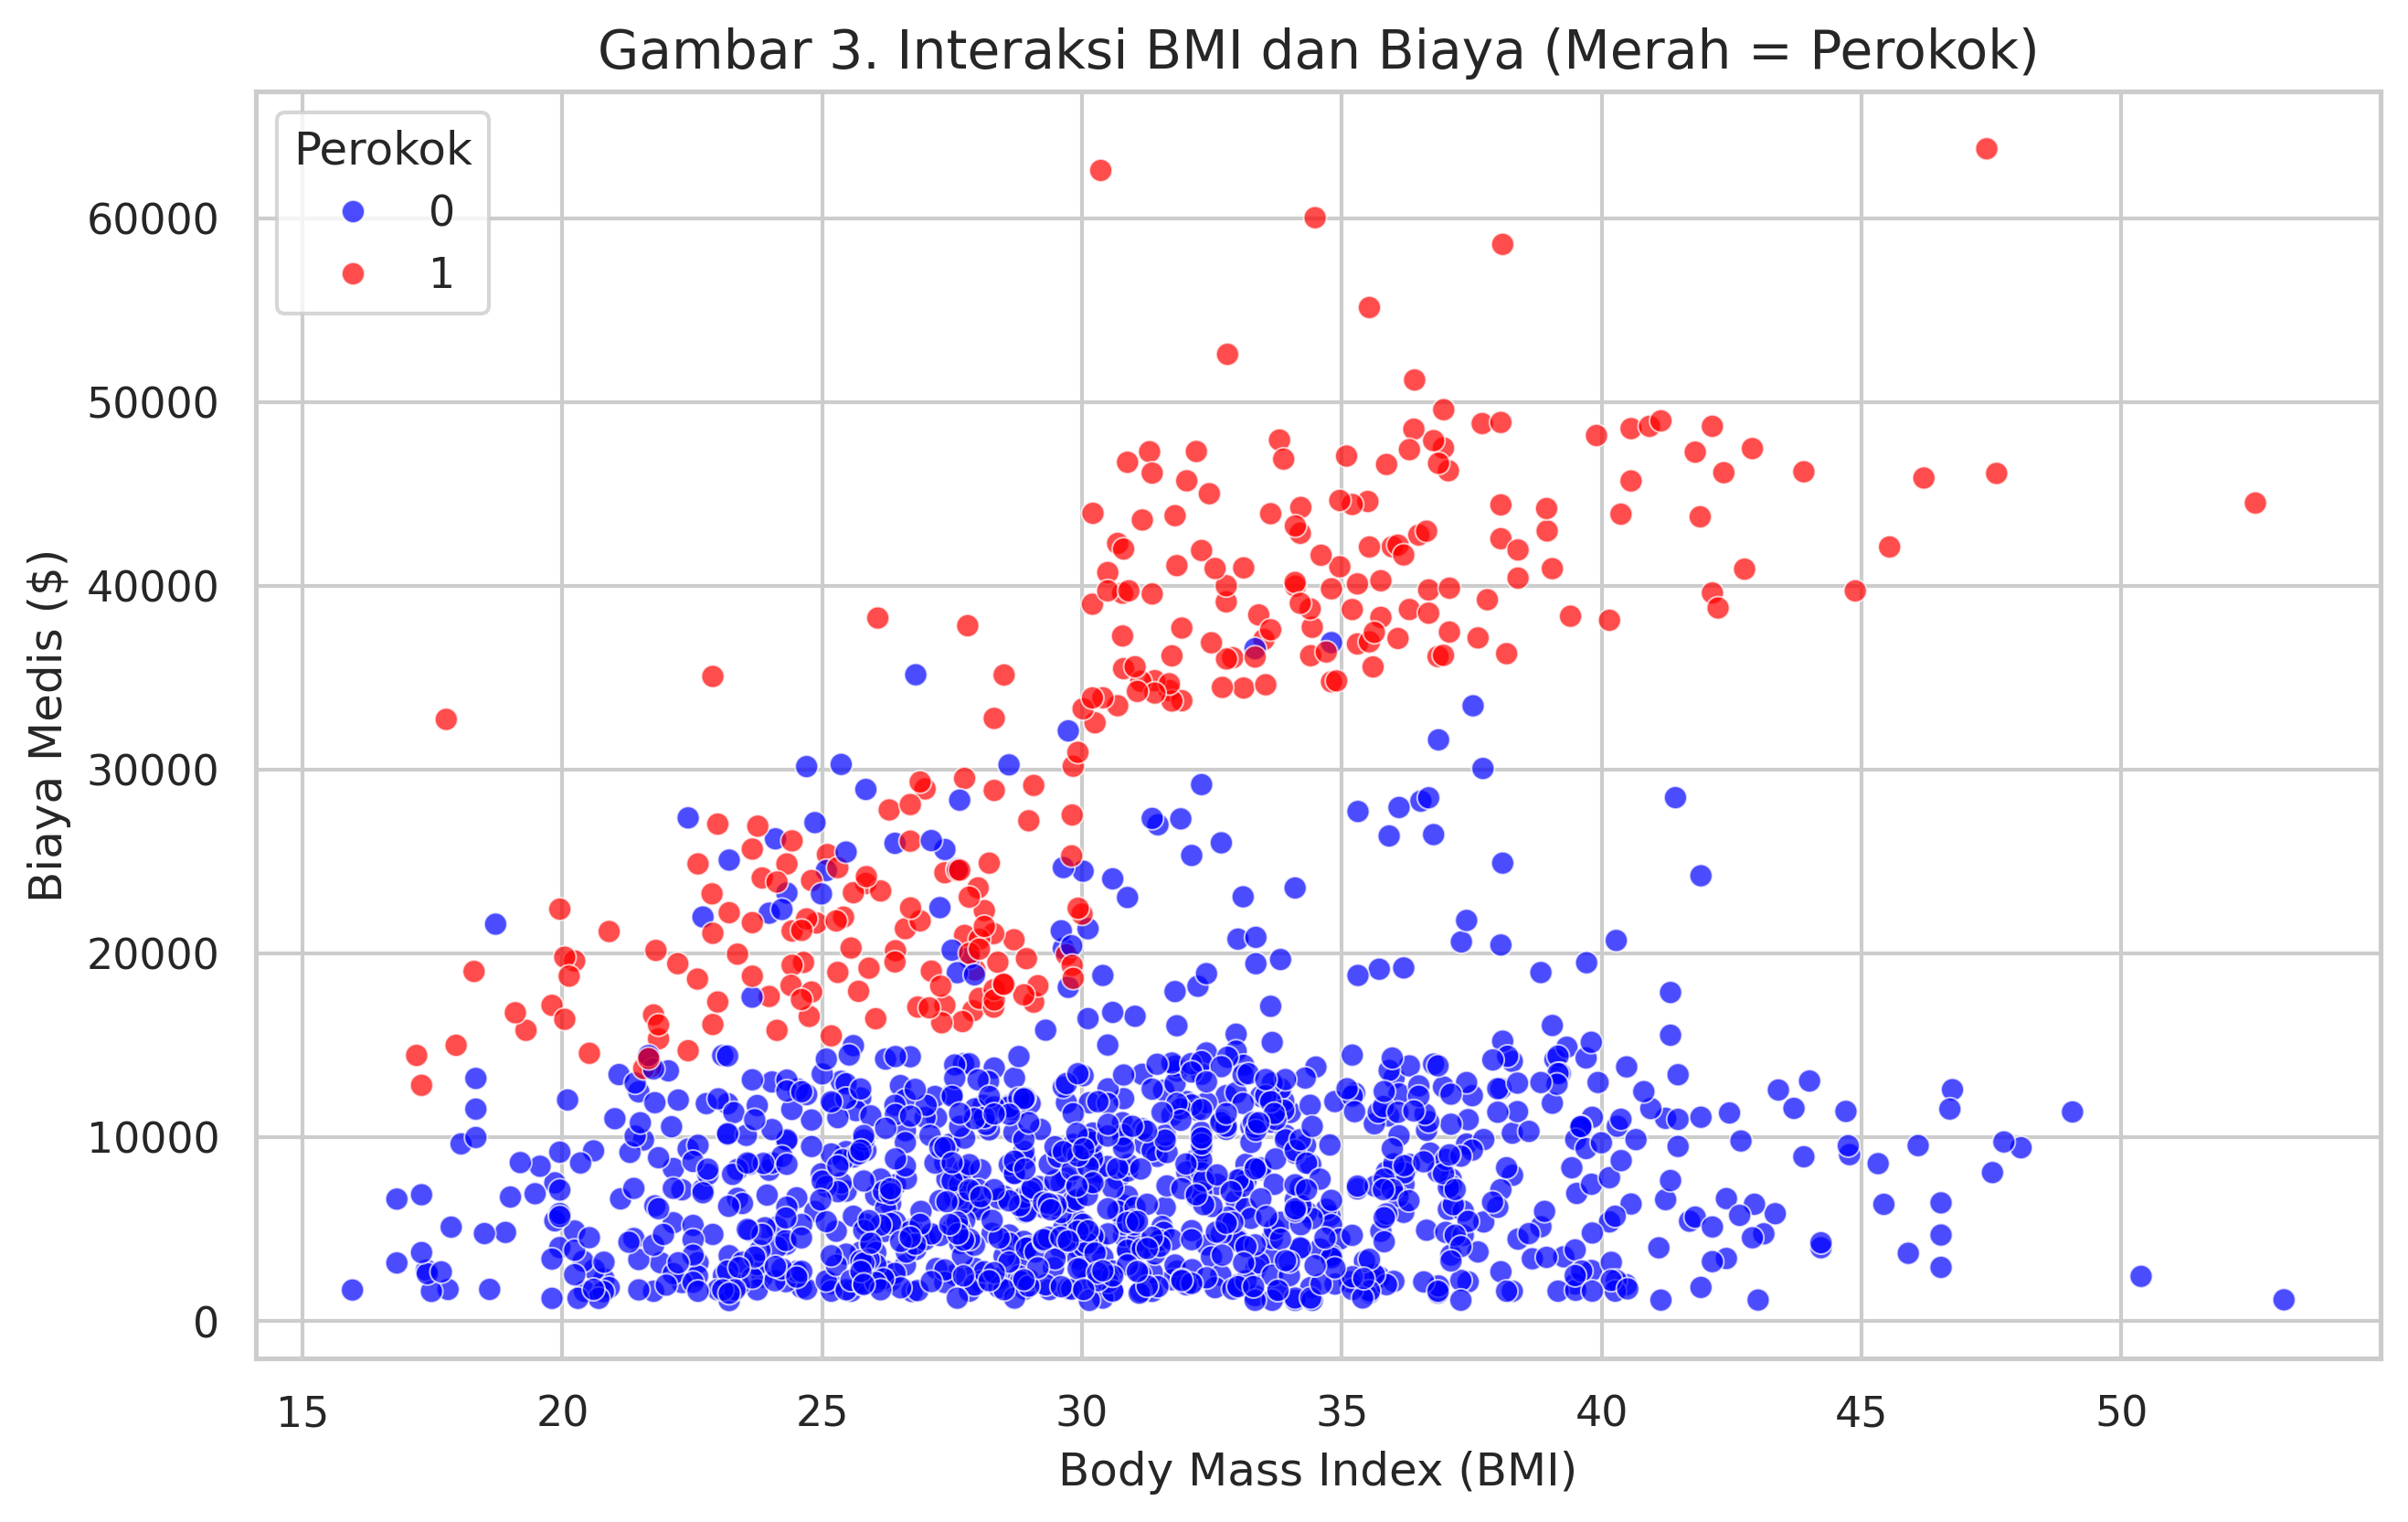

In [18]:
# 4.3. Scatterplot (BMI vs Charges hue Smoker)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, palette=['blue', 'red'], alpha=0.7)
plt.title('Gambar 3. Interaksi BMI dan Biaya (Merah = Perokok)', fontsize=14)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Biaya Medis ($)')
plt.legend(title='Perokok', loc='upper left')
plt.savefig('Gambar3_Scatter_Interaction.png', bbox_inches='tight')
plt.show()

In [19]:
# 5. Modeling (Random Forest)
print(f"------------------------------------------------------")
print("5. MODEL TRAINING")
print(f"------------------------------------------------------")

# a. Feature Selection
X = df.drop(columns=['charges']) # Features
y = df['charges']                # Target

# b. Splitting Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# c. Train Model
# n_estimators=100 (100 pohon keputusan), random_state=42 (agar hasil konsisten)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Model Random Forest berhasil dilatih.")

# d. Prediction
y_pred = rf_model.predict(X_test)

------------------------------------------------------
5. MODEL TRAINING
------------------------------------------------------
Model Random Forest berhasil dilatih.


------------------------------------------------------
6. EVALUATION METRICS
------------------------------------------------------
Metric     | Value          
-------------------------
MAE        | 2533.6746
RMSE       | 4590.5735
R2 Score   | 0.8643


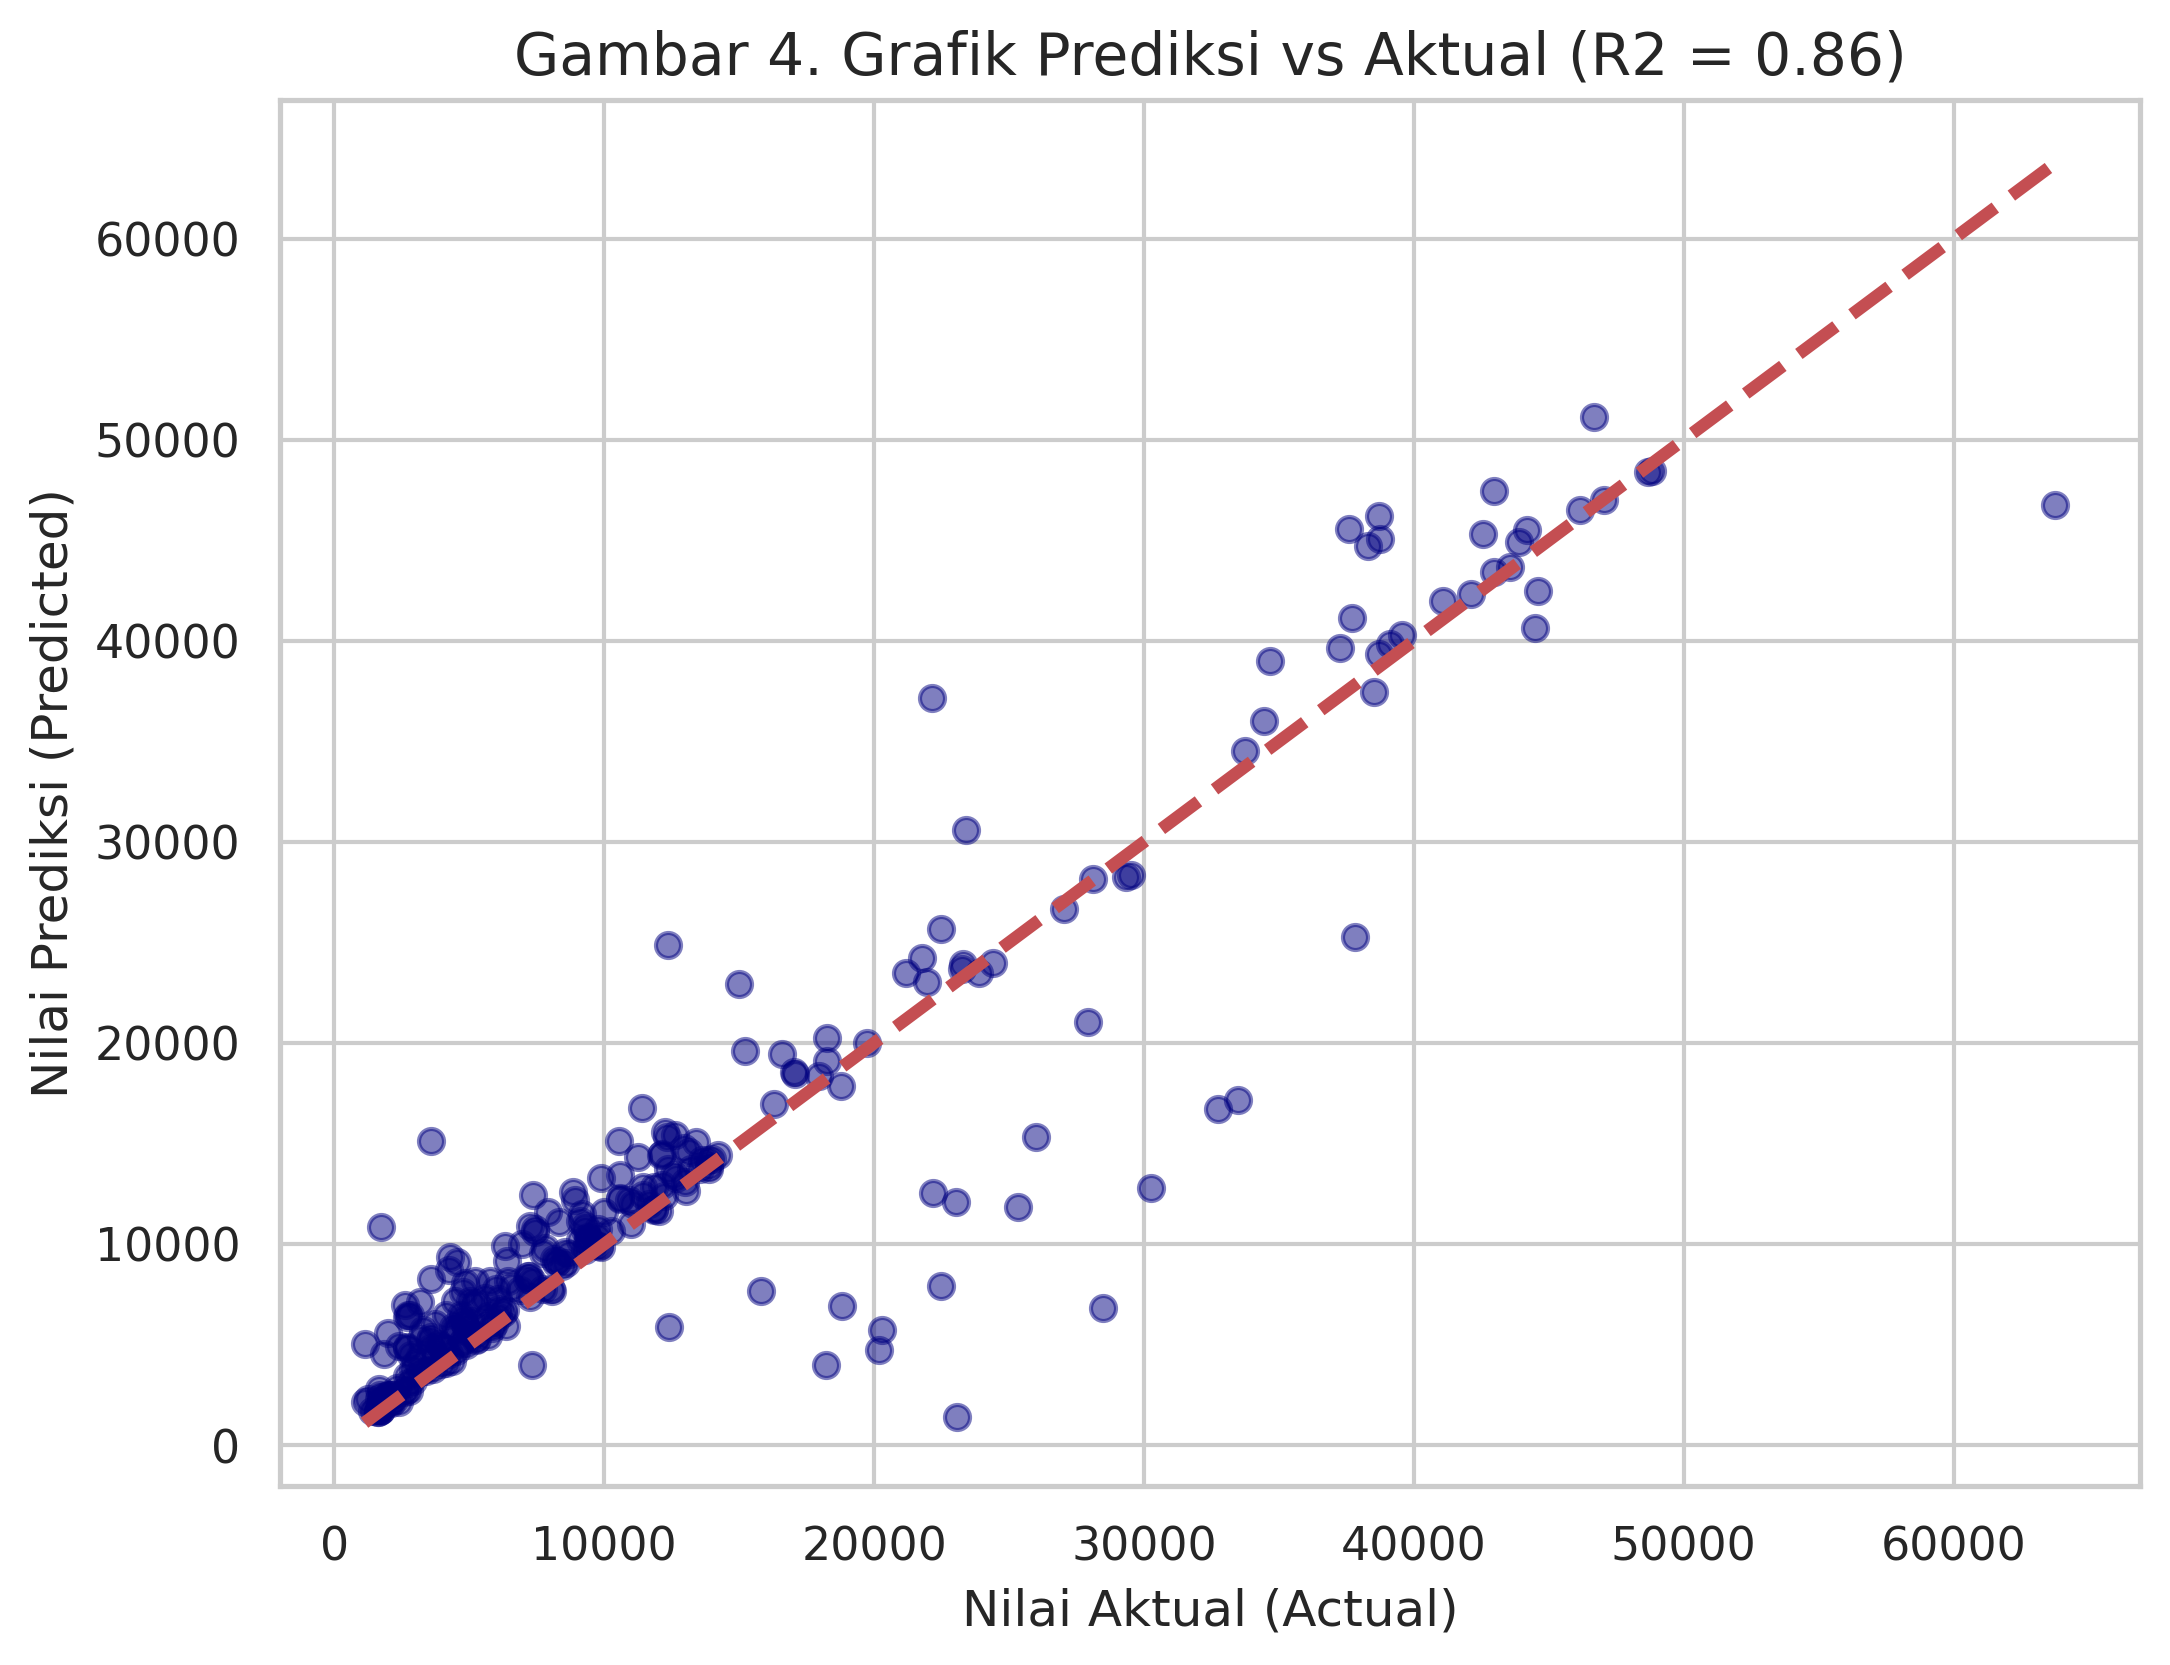

In [20]:
# 6. Evaluasi Model
print(f"------------------------------------------------------")
print("6. EVALUATION METRICS")
print(f"------------------------------------------------------")

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"{'Metric':<10} | {'Value':<15}")
print("-" * 25)
print(f"{'MAE':<10} | {mae:.4f}")
print(f"{'RMSE':<10} | {rmse:.4f}")
print(f"{'R2 Score':<10} | {r2:.4f}")

# Gbr 4. Prediksi vs Aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='navy', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=3) # Garis diagonal ideal
plt.xlabel('Nilai Aktual (Actual)')
plt.ylabel('Nilai Prediksi (Predicted)')
plt.title('Gambar 4. Grafik Prediksi vs Aktual (R2 = 0.86)', fontsize=14)
plt.grid(True)
plt.savefig('Gambar4_Prediksi_vs_Aktual.png', bbox_inches='tight')
plt.show()

In [21]:
# 7. Feature Importance
print(f"------------------------------------------------------")
print("7. FEATURE IMPORTANCE")
print(f"------------------------------------------------------")

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

------------------------------------------------------
7. FEATURE IMPORTANCE
------------------------------------------------------
smoker      0.608618
bmi         0.216291
age         0.134554
children    0.020199
region      0.013926
sex         0.006412
dtype: float64


In [22]:
# 8. Saving The Model (Exporting)
import joblib

# Menyimpan model ke dalam file bernama 'model_random_forest.pkl'
joblib.dump(rf_model, 'model_random_forest.pkl')

print("Model berhasil disimpan sebagai 'model_random_forest.pkl'")

Model berhasil disimpan sebagai 'model_random_forest.pkl'
